In [2]:
from pafpy import PafFile

In [9]:

overlaps = {}
samples = set()
with open("kpc2.5000.paf") as paf:
    for line in paf:
        fields = line.split("\t")
        blen = int(fields[10])
        qname = fields[0]
        tname = fields[5]
        samples.add(qname)
        samples.add(tname)
        pair = tuple(sorted([qname, tname]))
        if pair not in overlaps:
            overlaps[pair] = blen

In [10]:
# incrementally include reads and record the number of overlaps (and lengths) of that 
# read to all other included reads so far 
included = set()
cum_overlaps = []
cum_length = []
n_overlapping_pairs = []
n_possible_pairs = []
for i, s in enumerate(samples):
    included.add(s)
    n_possible_pairs.append((i+1)*(i)/2)
    total_overlaps = 0
    total_length = 0
    n_pairs = 0
    for pair, blen in overlaps.items():
        if pair[0] in included and pair[1] in included:
            total_overlaps += 1
            total_length += blen
            n_pairs += 1
    cum_overlaps.append(total_overlaps)
    cum_length.append(total_length)
    n_overlapping_pairs.append(n_pairs)


In [11]:
# calculate the cumulative average of the overlap lengths
cum_avg = []
for i in range(len(cum_overlaps)):
    if cum_overlaps[i] == 0:
        cum_avg.append(0)
    else:
        cum_avg.append(cum_length[i] / cum_overlaps[i])

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


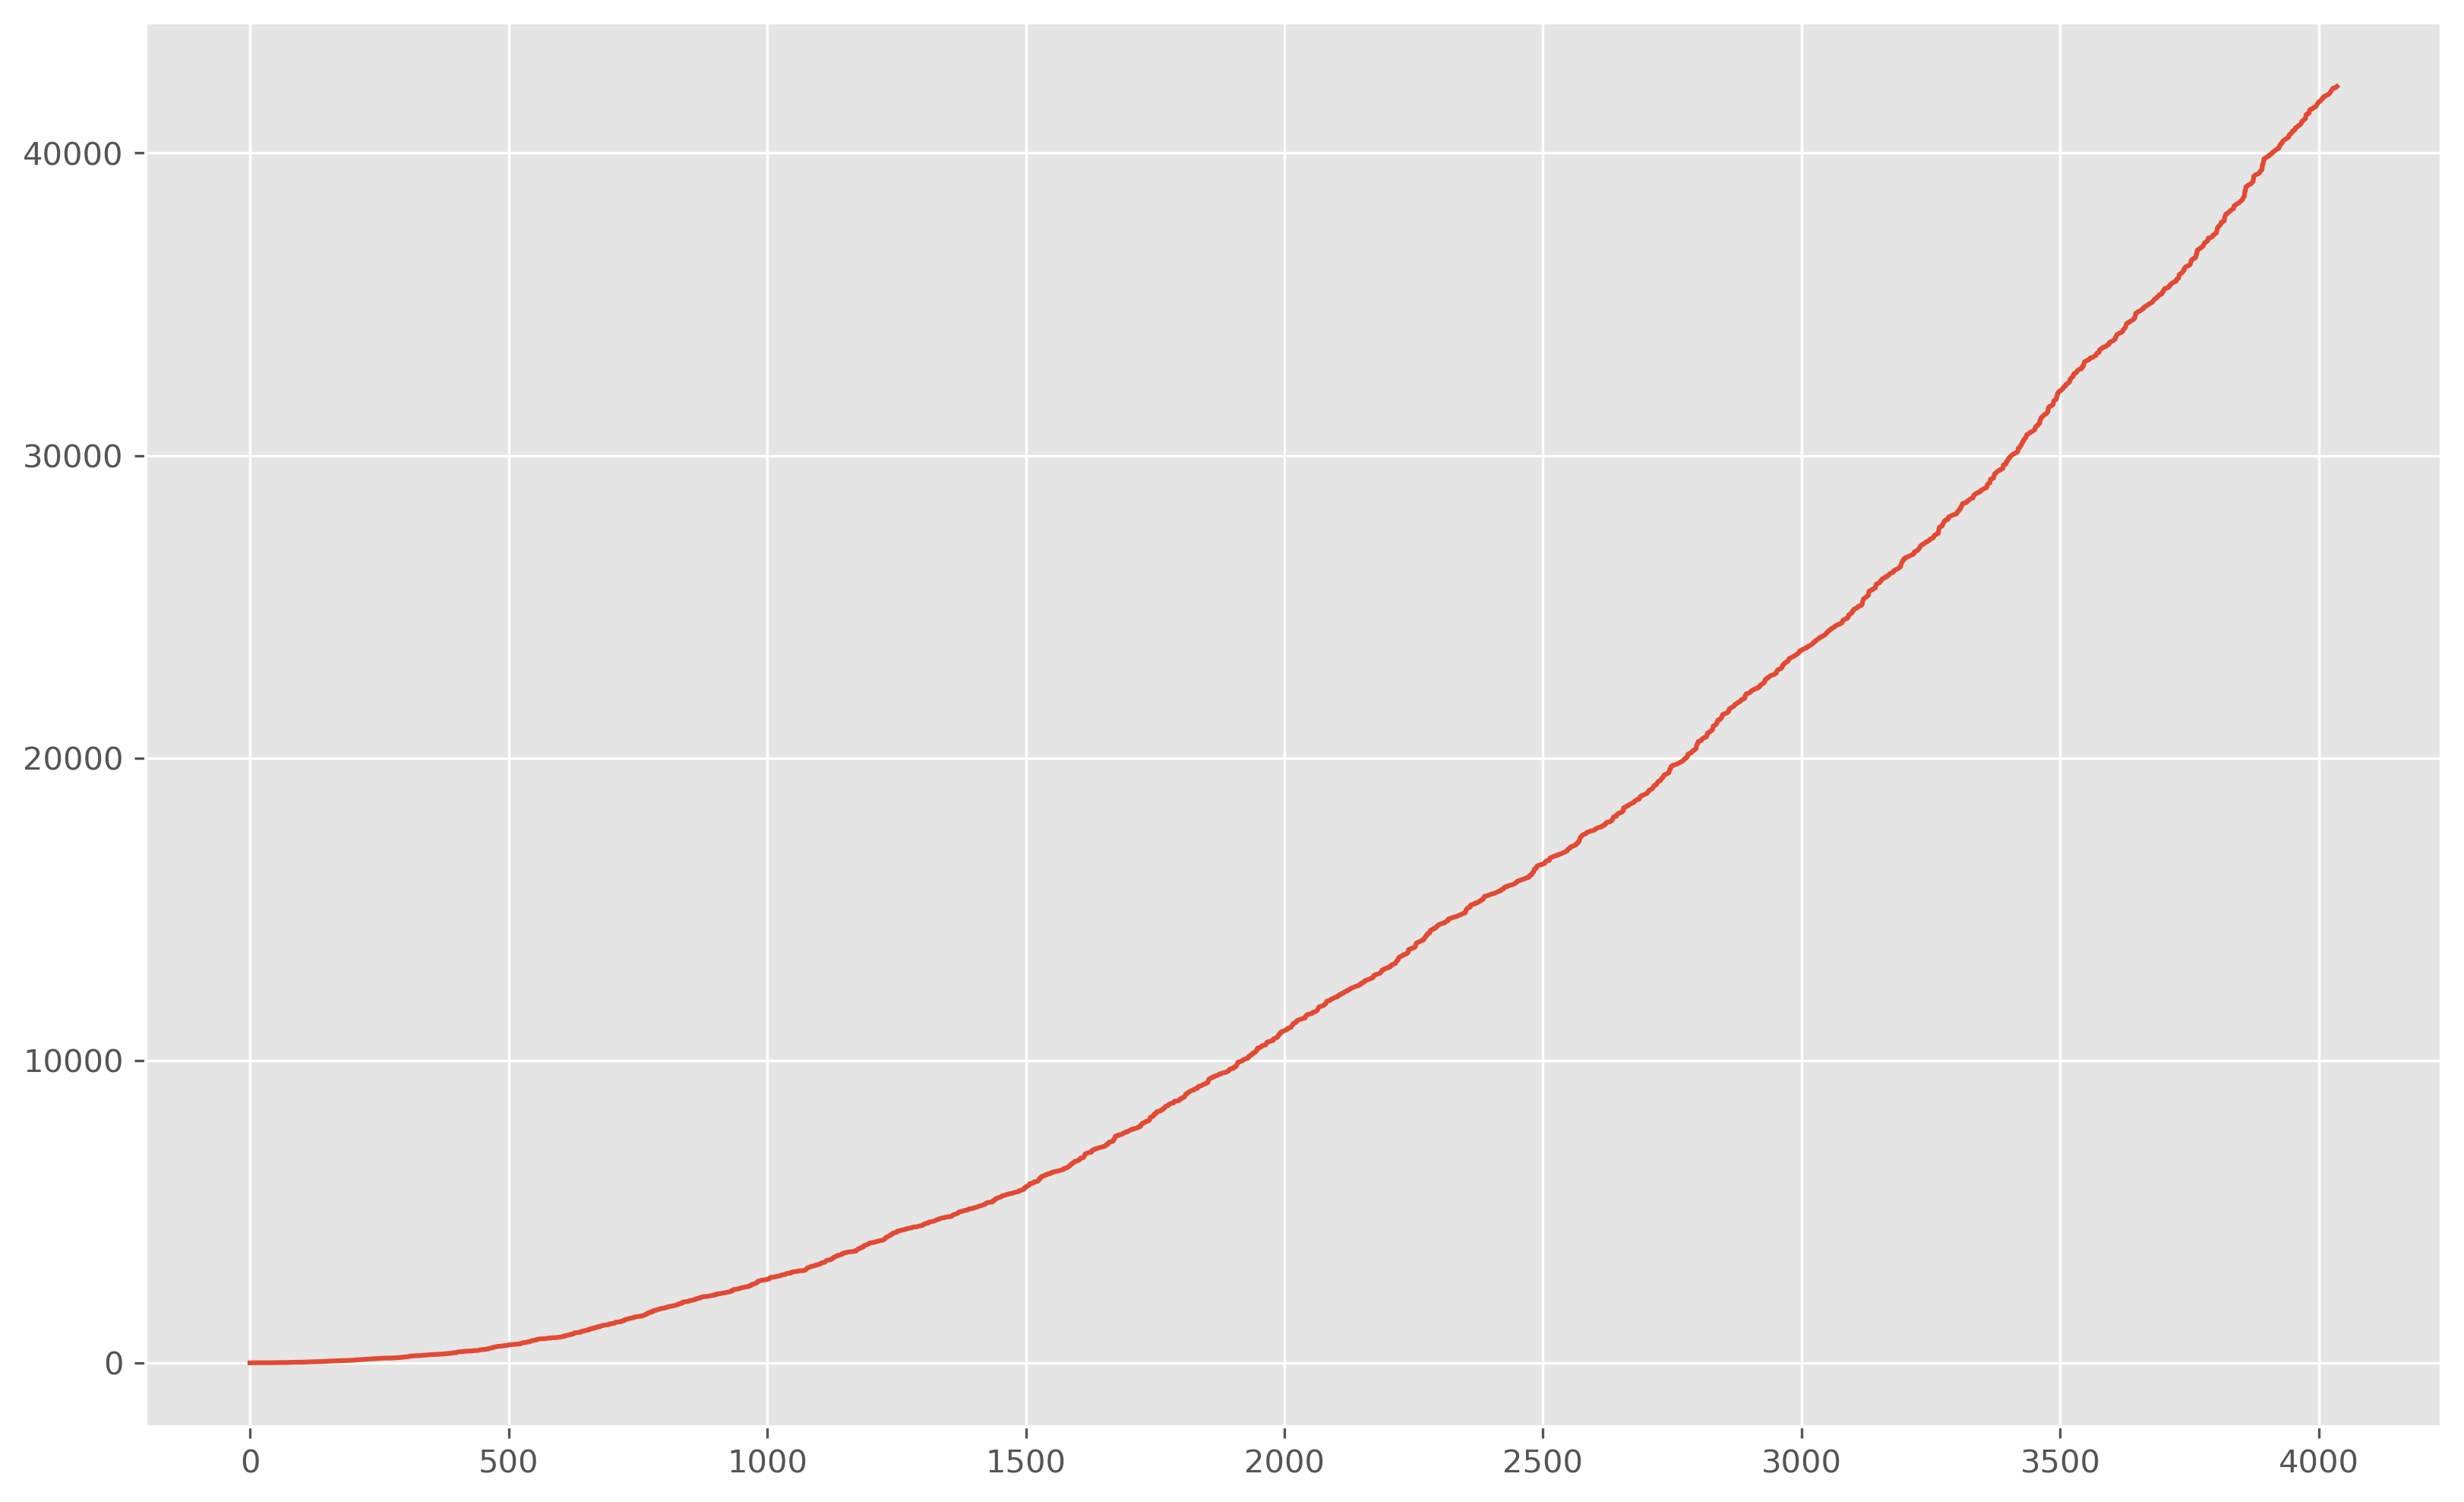

In [13]:
# plot the cumulative number of overlaps
plt.plot(cum_overlaps)

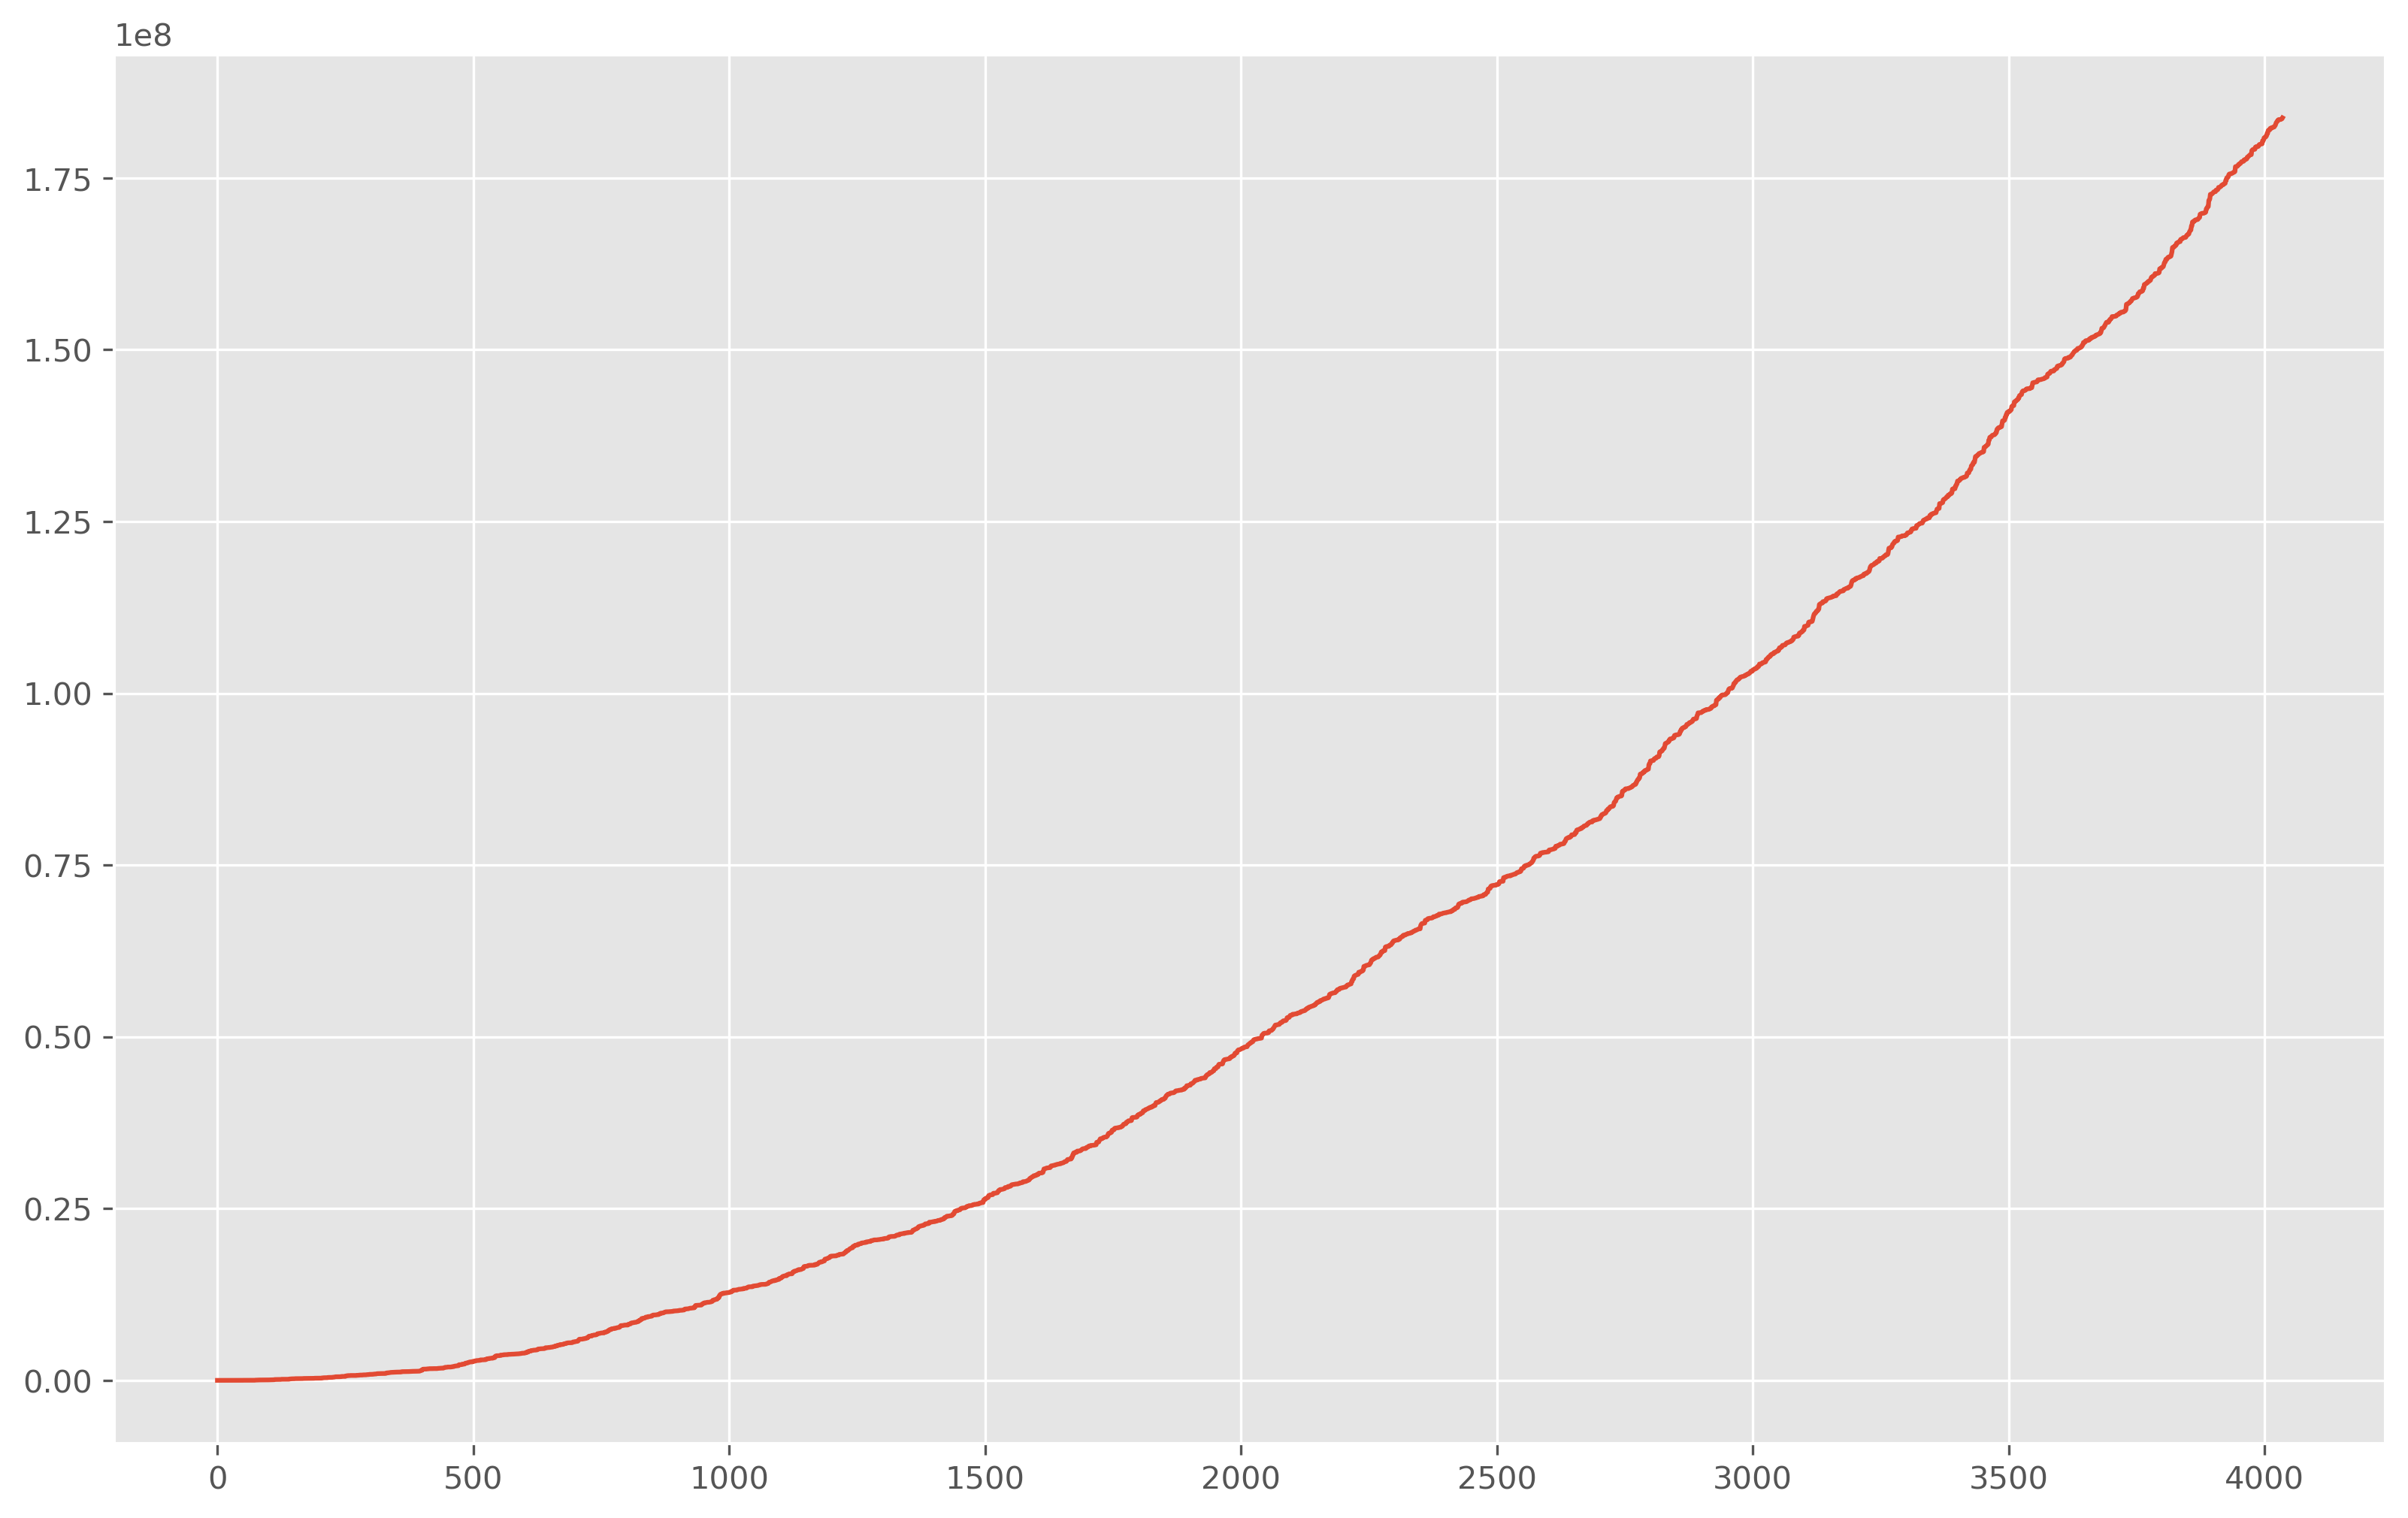

In [14]:
plt.plot(cum_length)

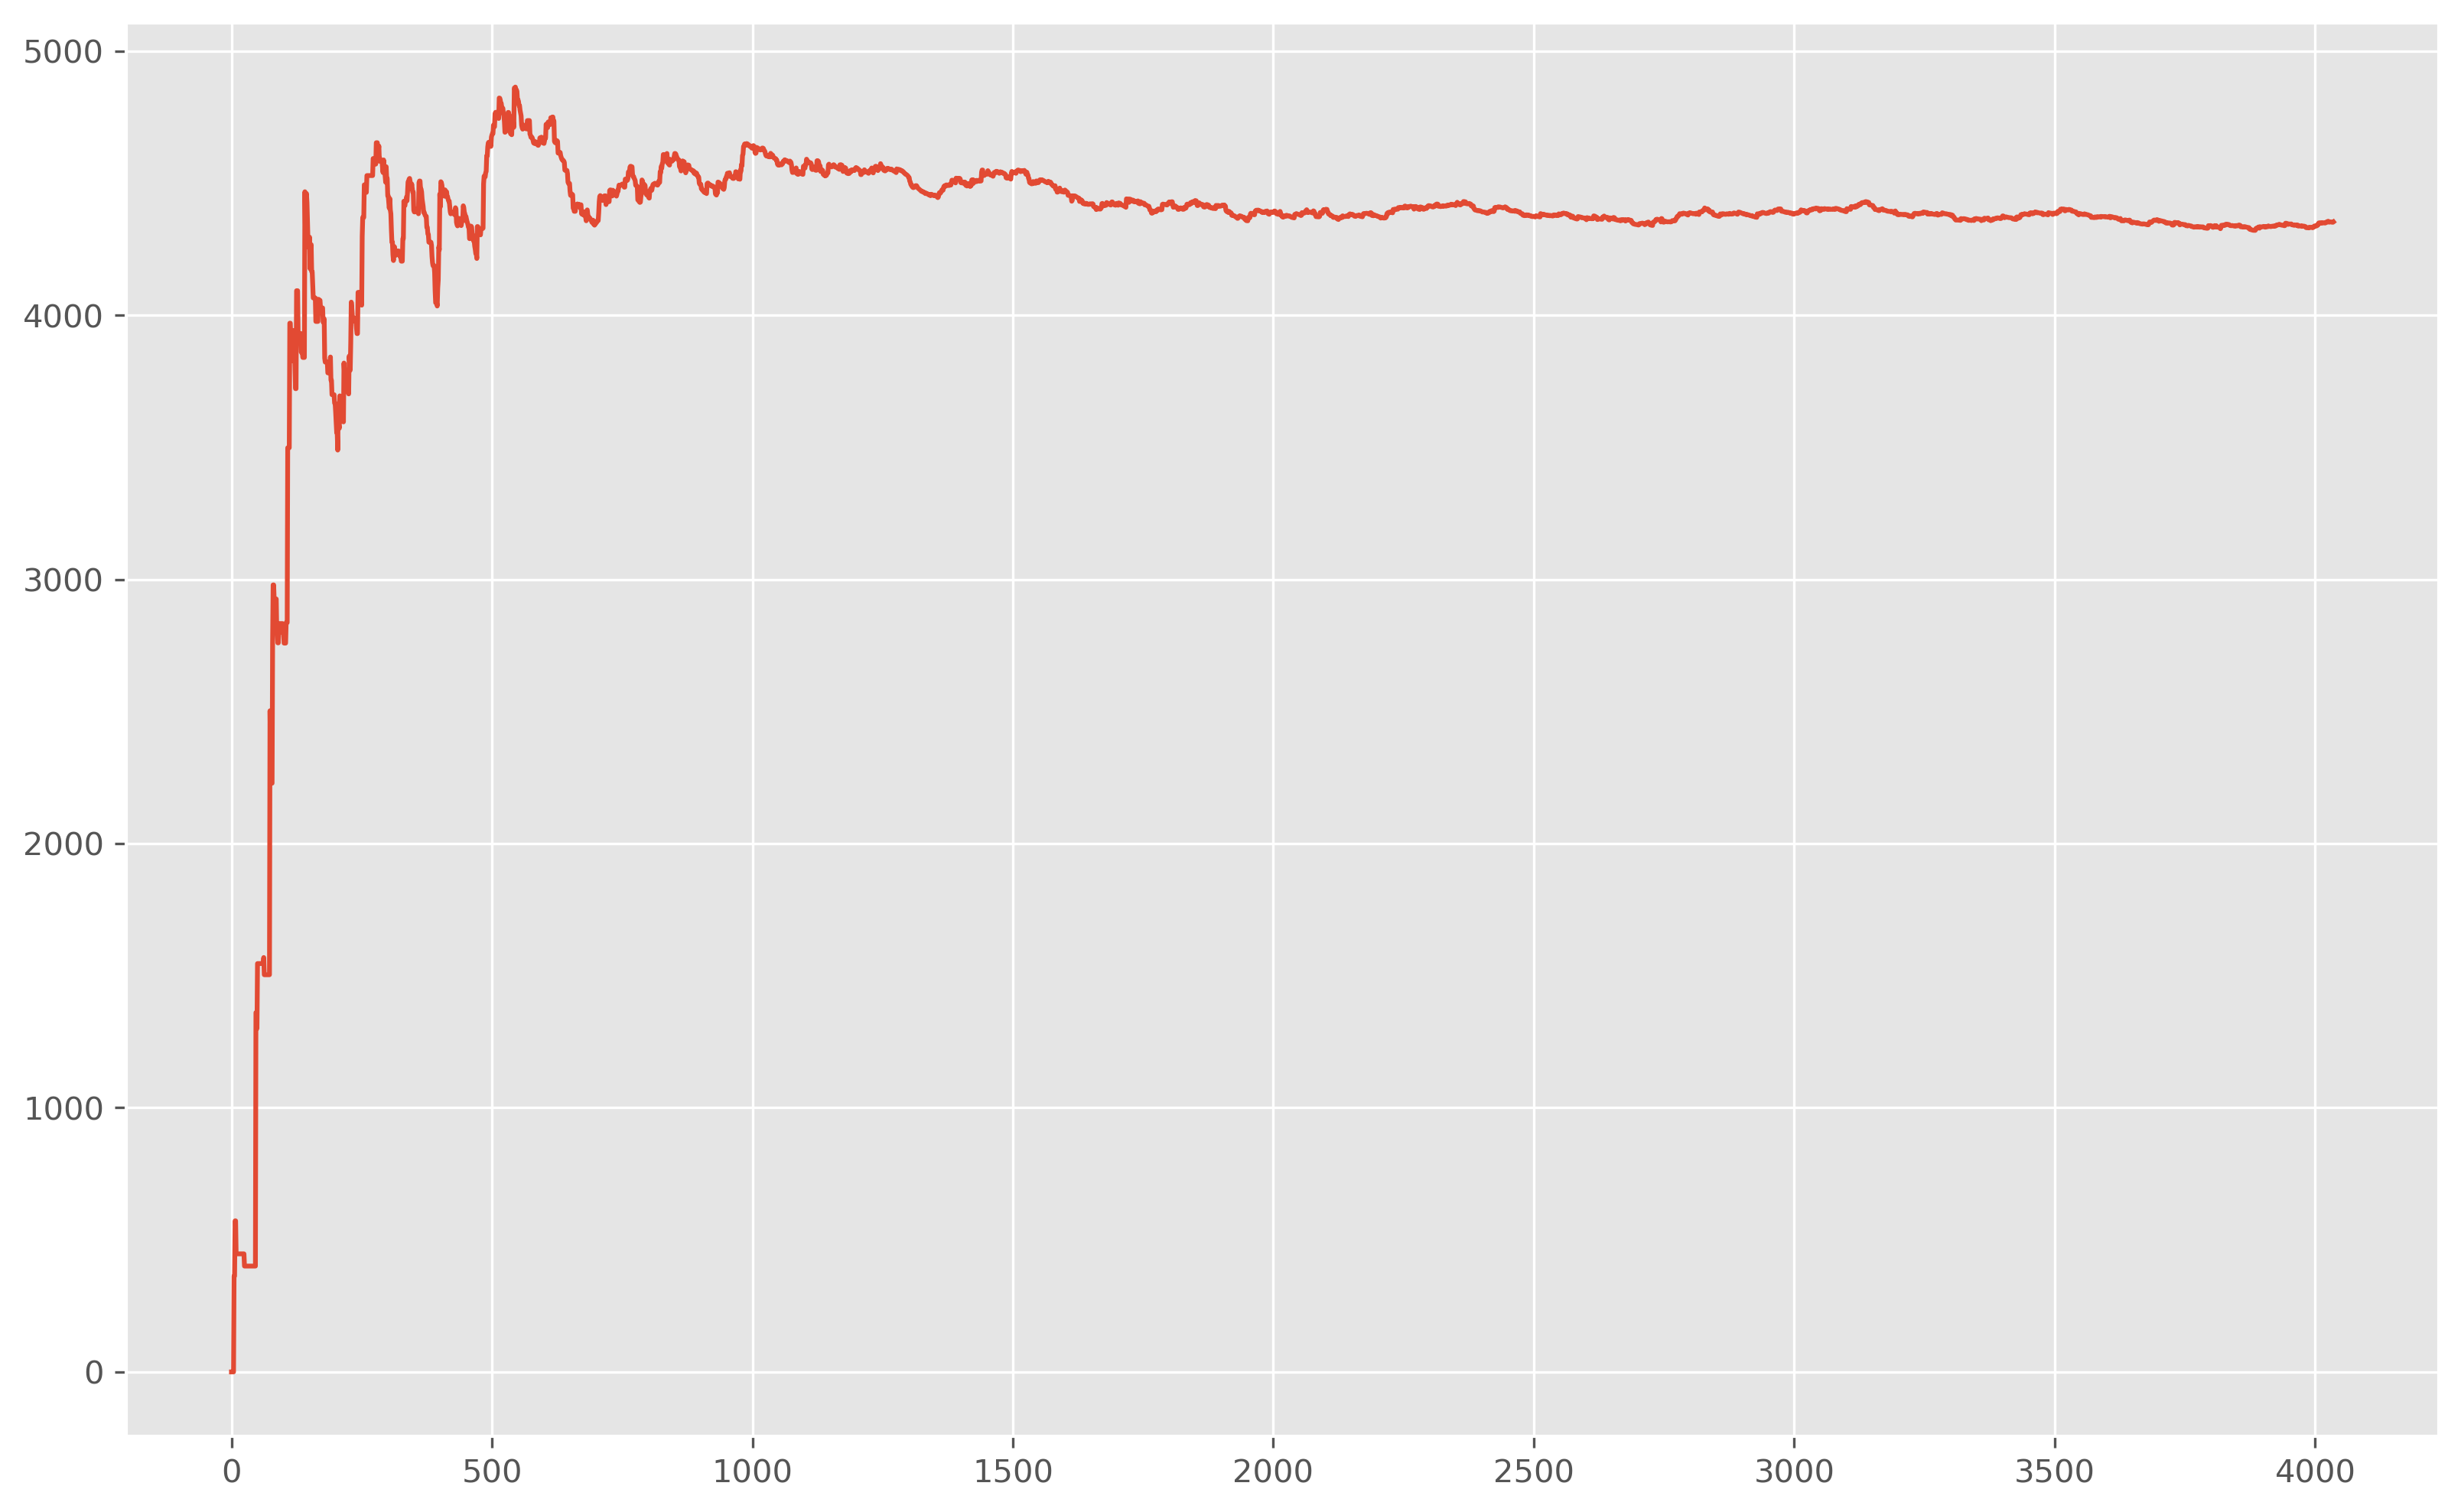

In [15]:
plt.plot(cum_avg)

Text(0.5, 0, 'Number of overlapping pairs')

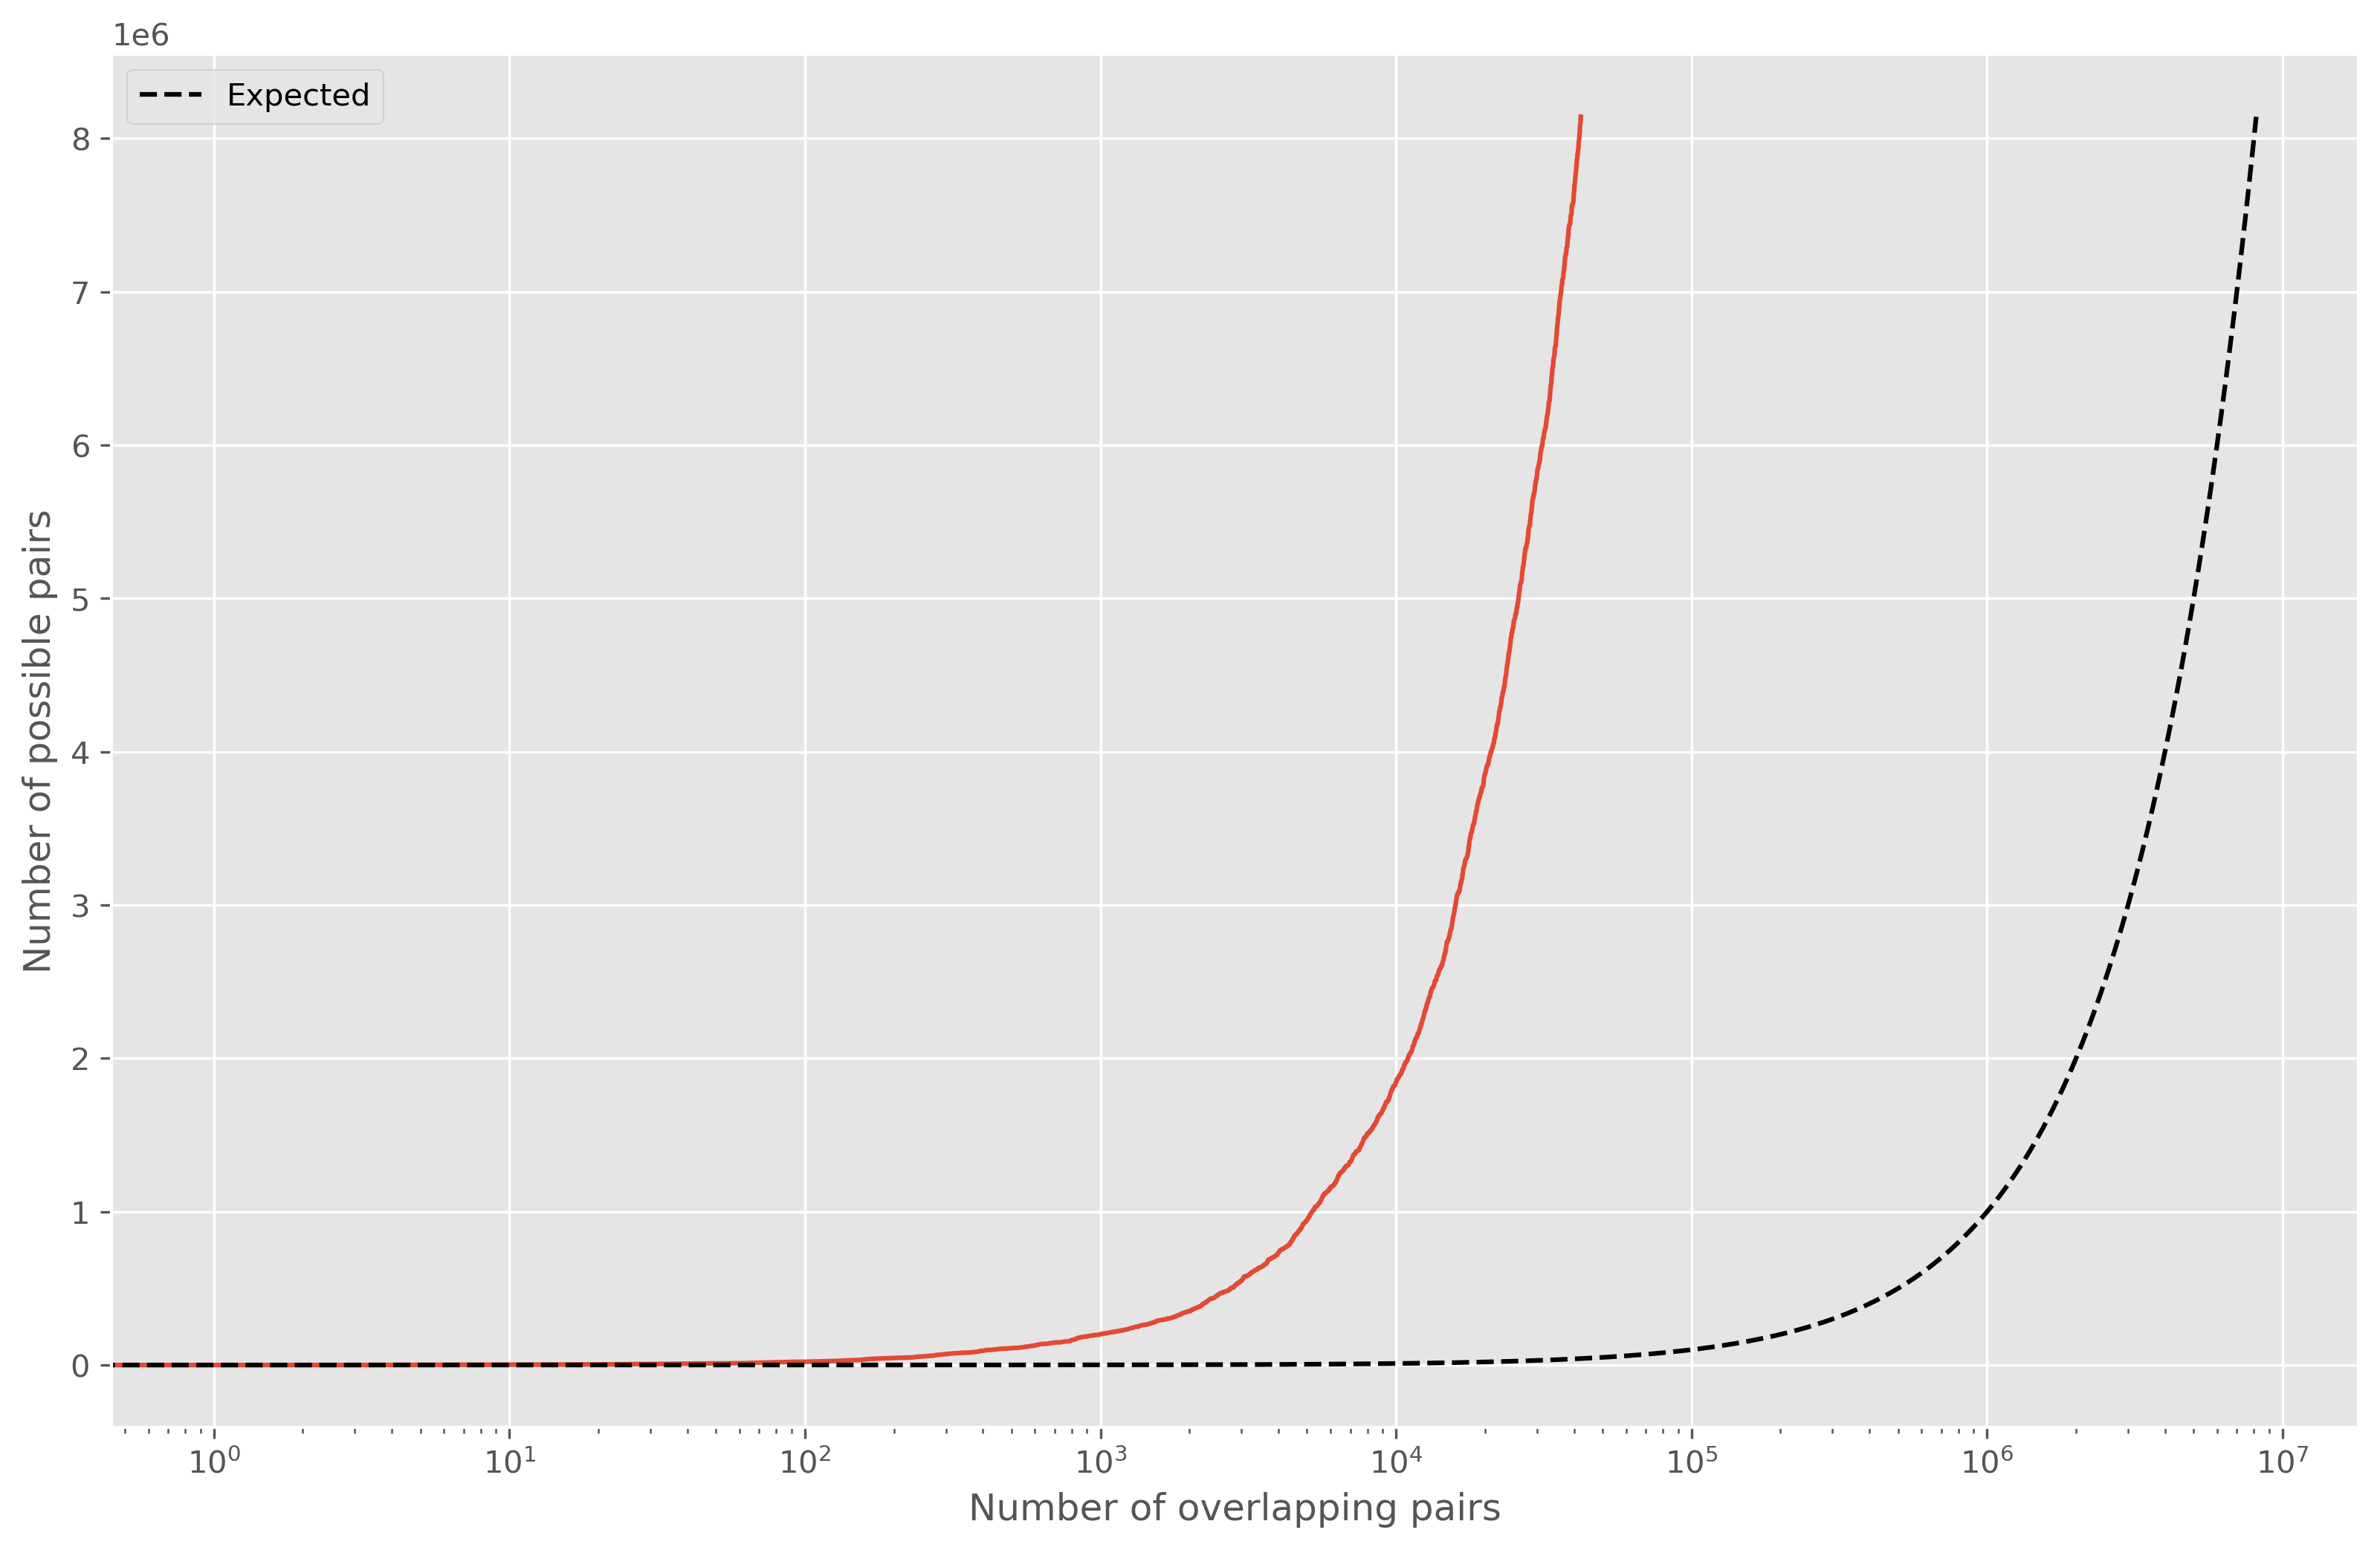

In [16]:
# plot the number of expected pairs (y-axis) against the number of actual pairs (x-axis)
fig, ax = plt.subplots(dpi=300)
sns.lineplot(x=n_overlapping_pairs, y=n_possible_pairs, ax=ax)
# add a diagonal line to show what the number of overlaps should be if it followed the expected number of overlaps
sns.lineplot(x=n_possible_pairs, y=n_possible_pairs, ax=ax, color="black", linestyle="--", label="Expected")
ax.set_xscale("log")
# ax.set_yscale("log")
plt.ylabel("Number of possible pairs")
plt.xlabel("Number of overlapping pairs")
# yticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
# plt.xticks(xticks, xticks)
# plt.yticks(yticks, yticks)

In [17]:
10**5

100000

Looking at whether all-vs-all overlaps returns more overlaps for a read compared to half-vs-half

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

In [2]:
with open("../tmp/longest.ids") as f:
    longest = set([line.strip() for line in f])

with open("../tmp/overlap.ids") as f:
    overlap = set([line.strip() for line in f])

assert len(longest) == len(overlap)

In [35]:
read_overlaps = {"hvh": Counter(), "ava": Counter()}
pair_counts = {"hvh": Counter(), "ava": Counter()}

In [36]:
with open("../tmp/AMtb_1.ava.paf") as paf:
    for line in paf:
        fields = line.split("\t")
        qname = fields[0]
        tname = fields[5]

        if qname in longest and tname in longest:
            continue
        elif qname in overlap and tname in overlap:
            continue

        pair = tuple(sorted([qname, tname]))
        read_overlaps["ava"][qname] += 1
        read_overlaps["ava"][tname] += 1
        pair_counts["ava"][pair] += 1

In [37]:
with open("../tmp/AMtb_1.hvh.dual.paf") as paf:
    for line in paf:
        fields = line.split("\t")
        qname = fields[0]
        tname = fields[5]
        pair = tuple(sorted([qname, tname]))
        read_overlaps["hvh"][qname] += 1
        read_overlaps["hvh"][tname] += 1
        pair_counts["hvh"][pair] += 1

In [38]:
print(f'{sum(read_overlaps["ava"].values())} overlaps in ava')
print(f'{sum(read_overlaps["hvh"].values())} overlaps in hvh')
2651942/1349422

2651942 overlaps in ava
2684050 overlaps in hvh


1.965242896588317

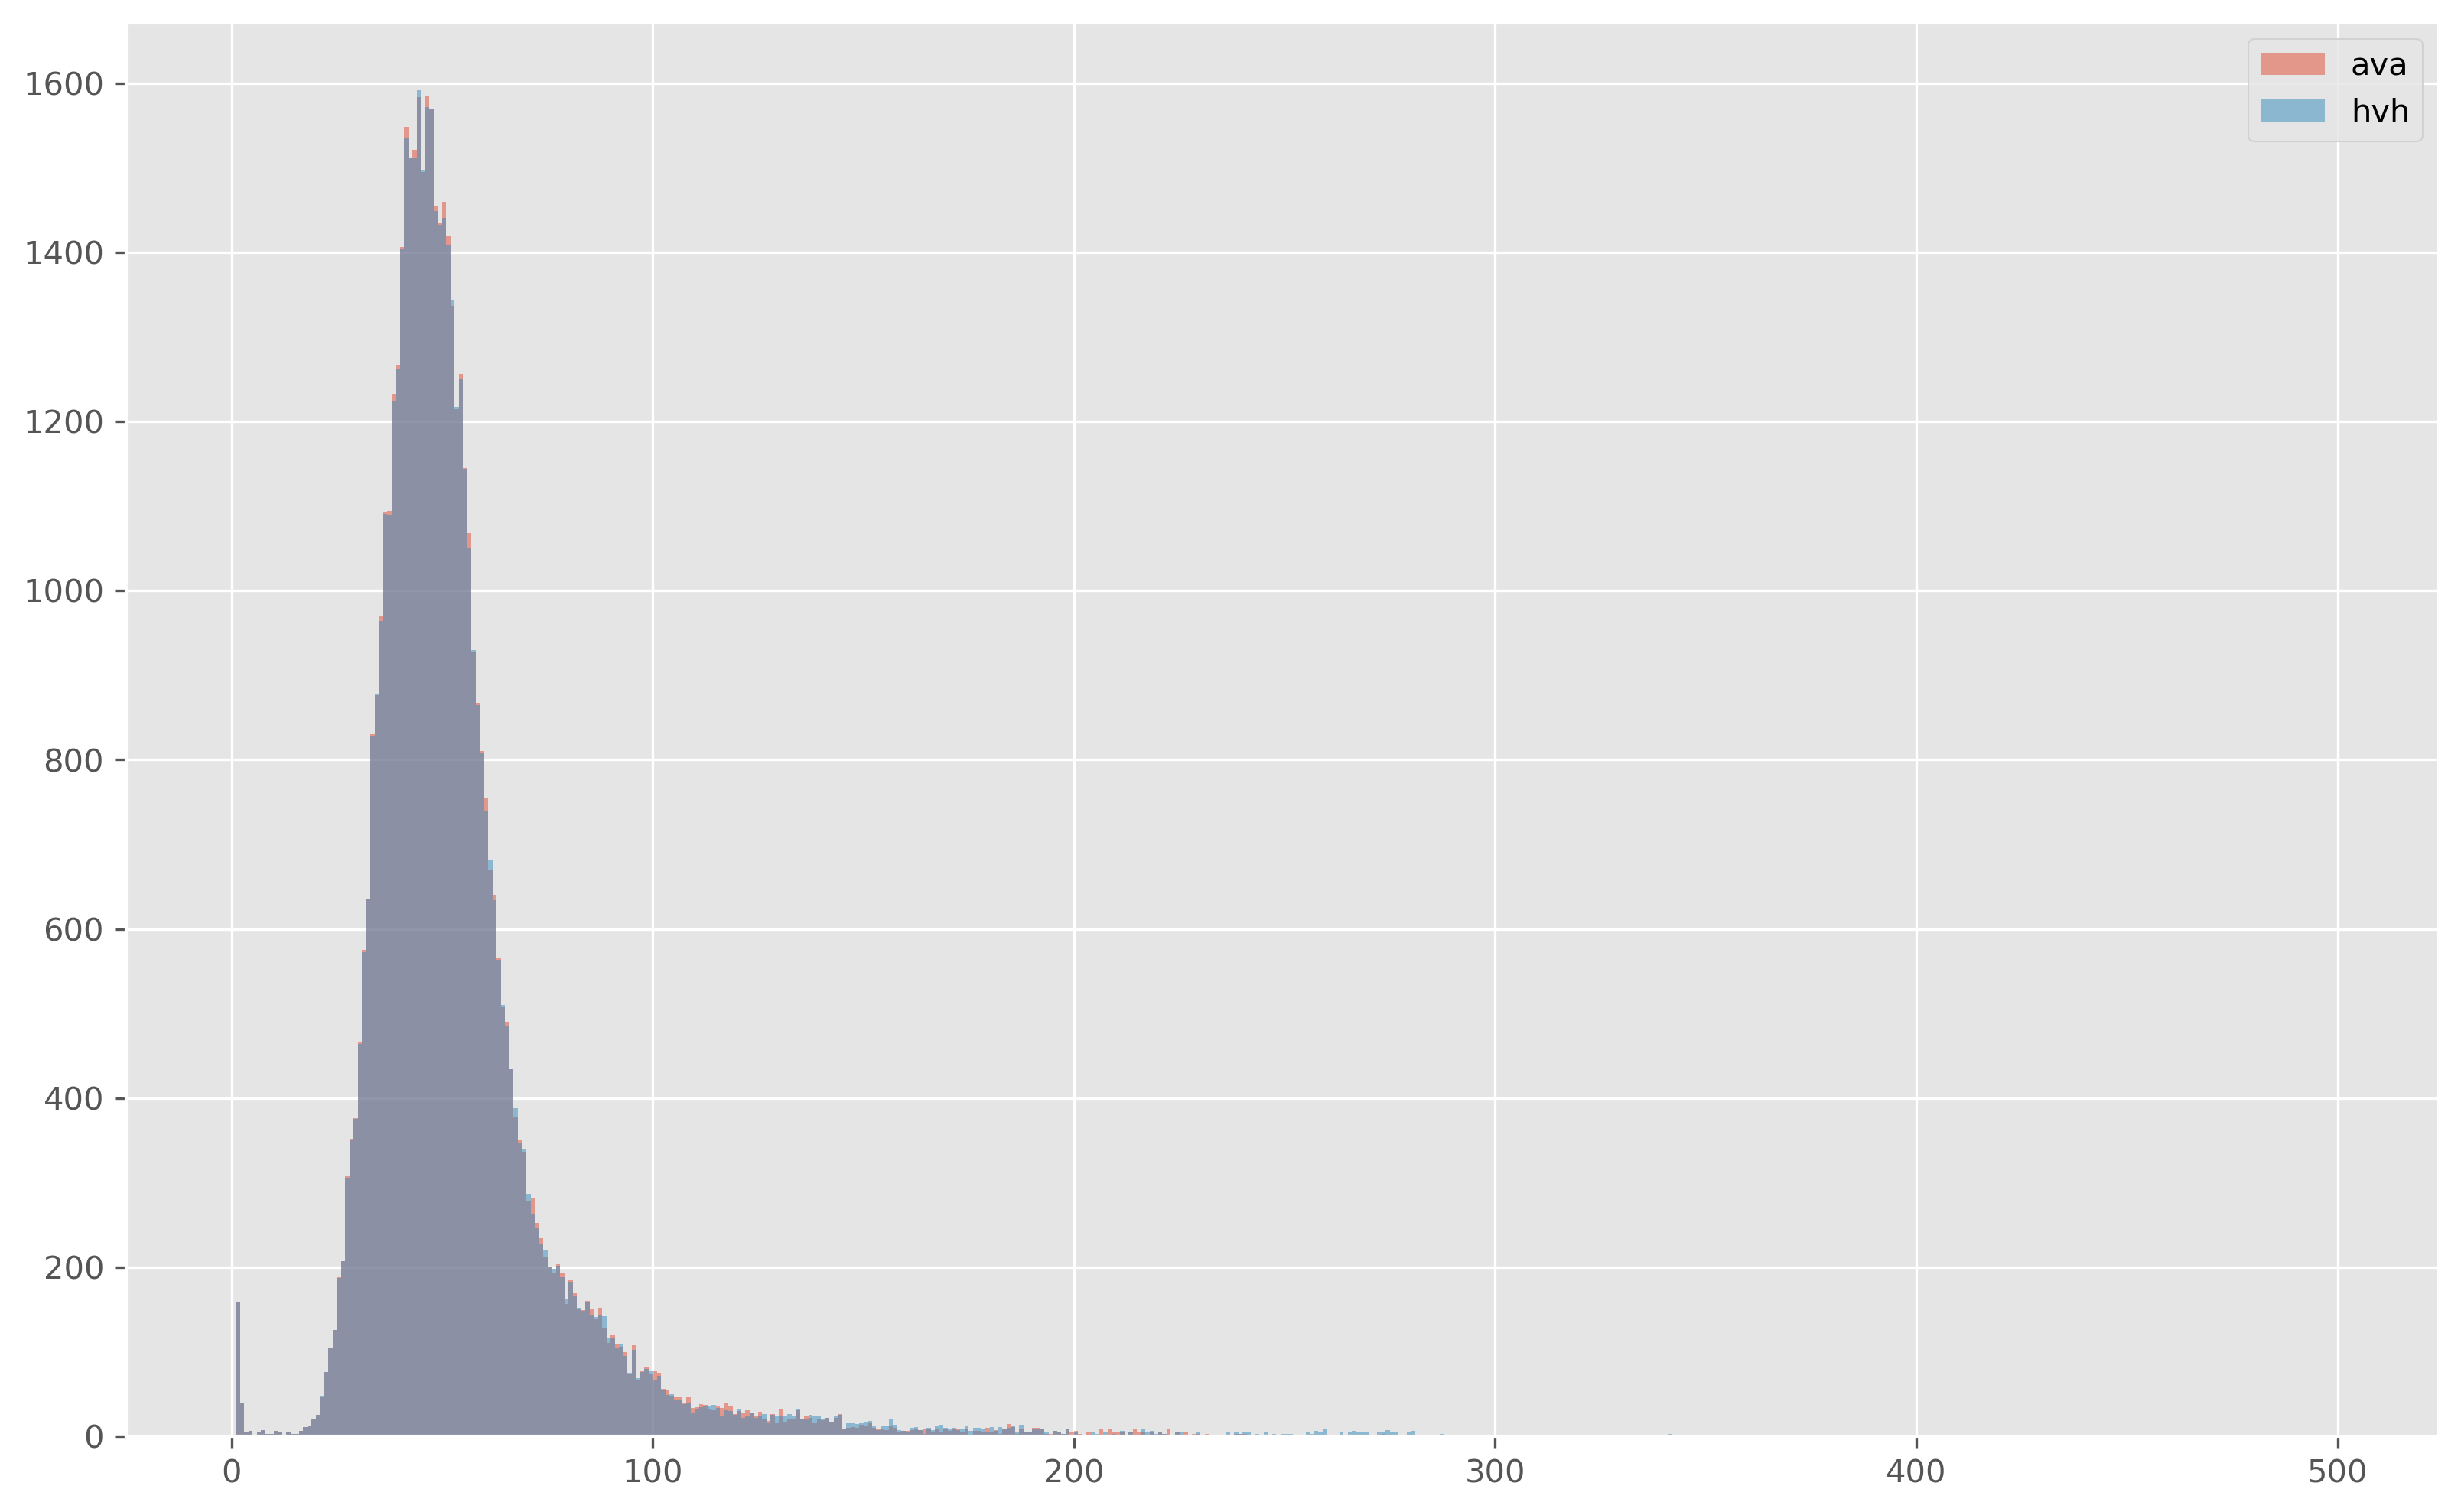

In [39]:
# plot histograms of the number of overlaps per read for ava and hvh
fig, ax = plt.subplots(dpi=300)
ax.hist(read_overlaps["ava"].values(), bins=range(0, 500, 1), alpha=0.5, label="ava")
ax.hist(read_overlaps["hvh"].values(), bins=range(0, 500, 1), alpha=0.5, label="hvh")
ax.legend()

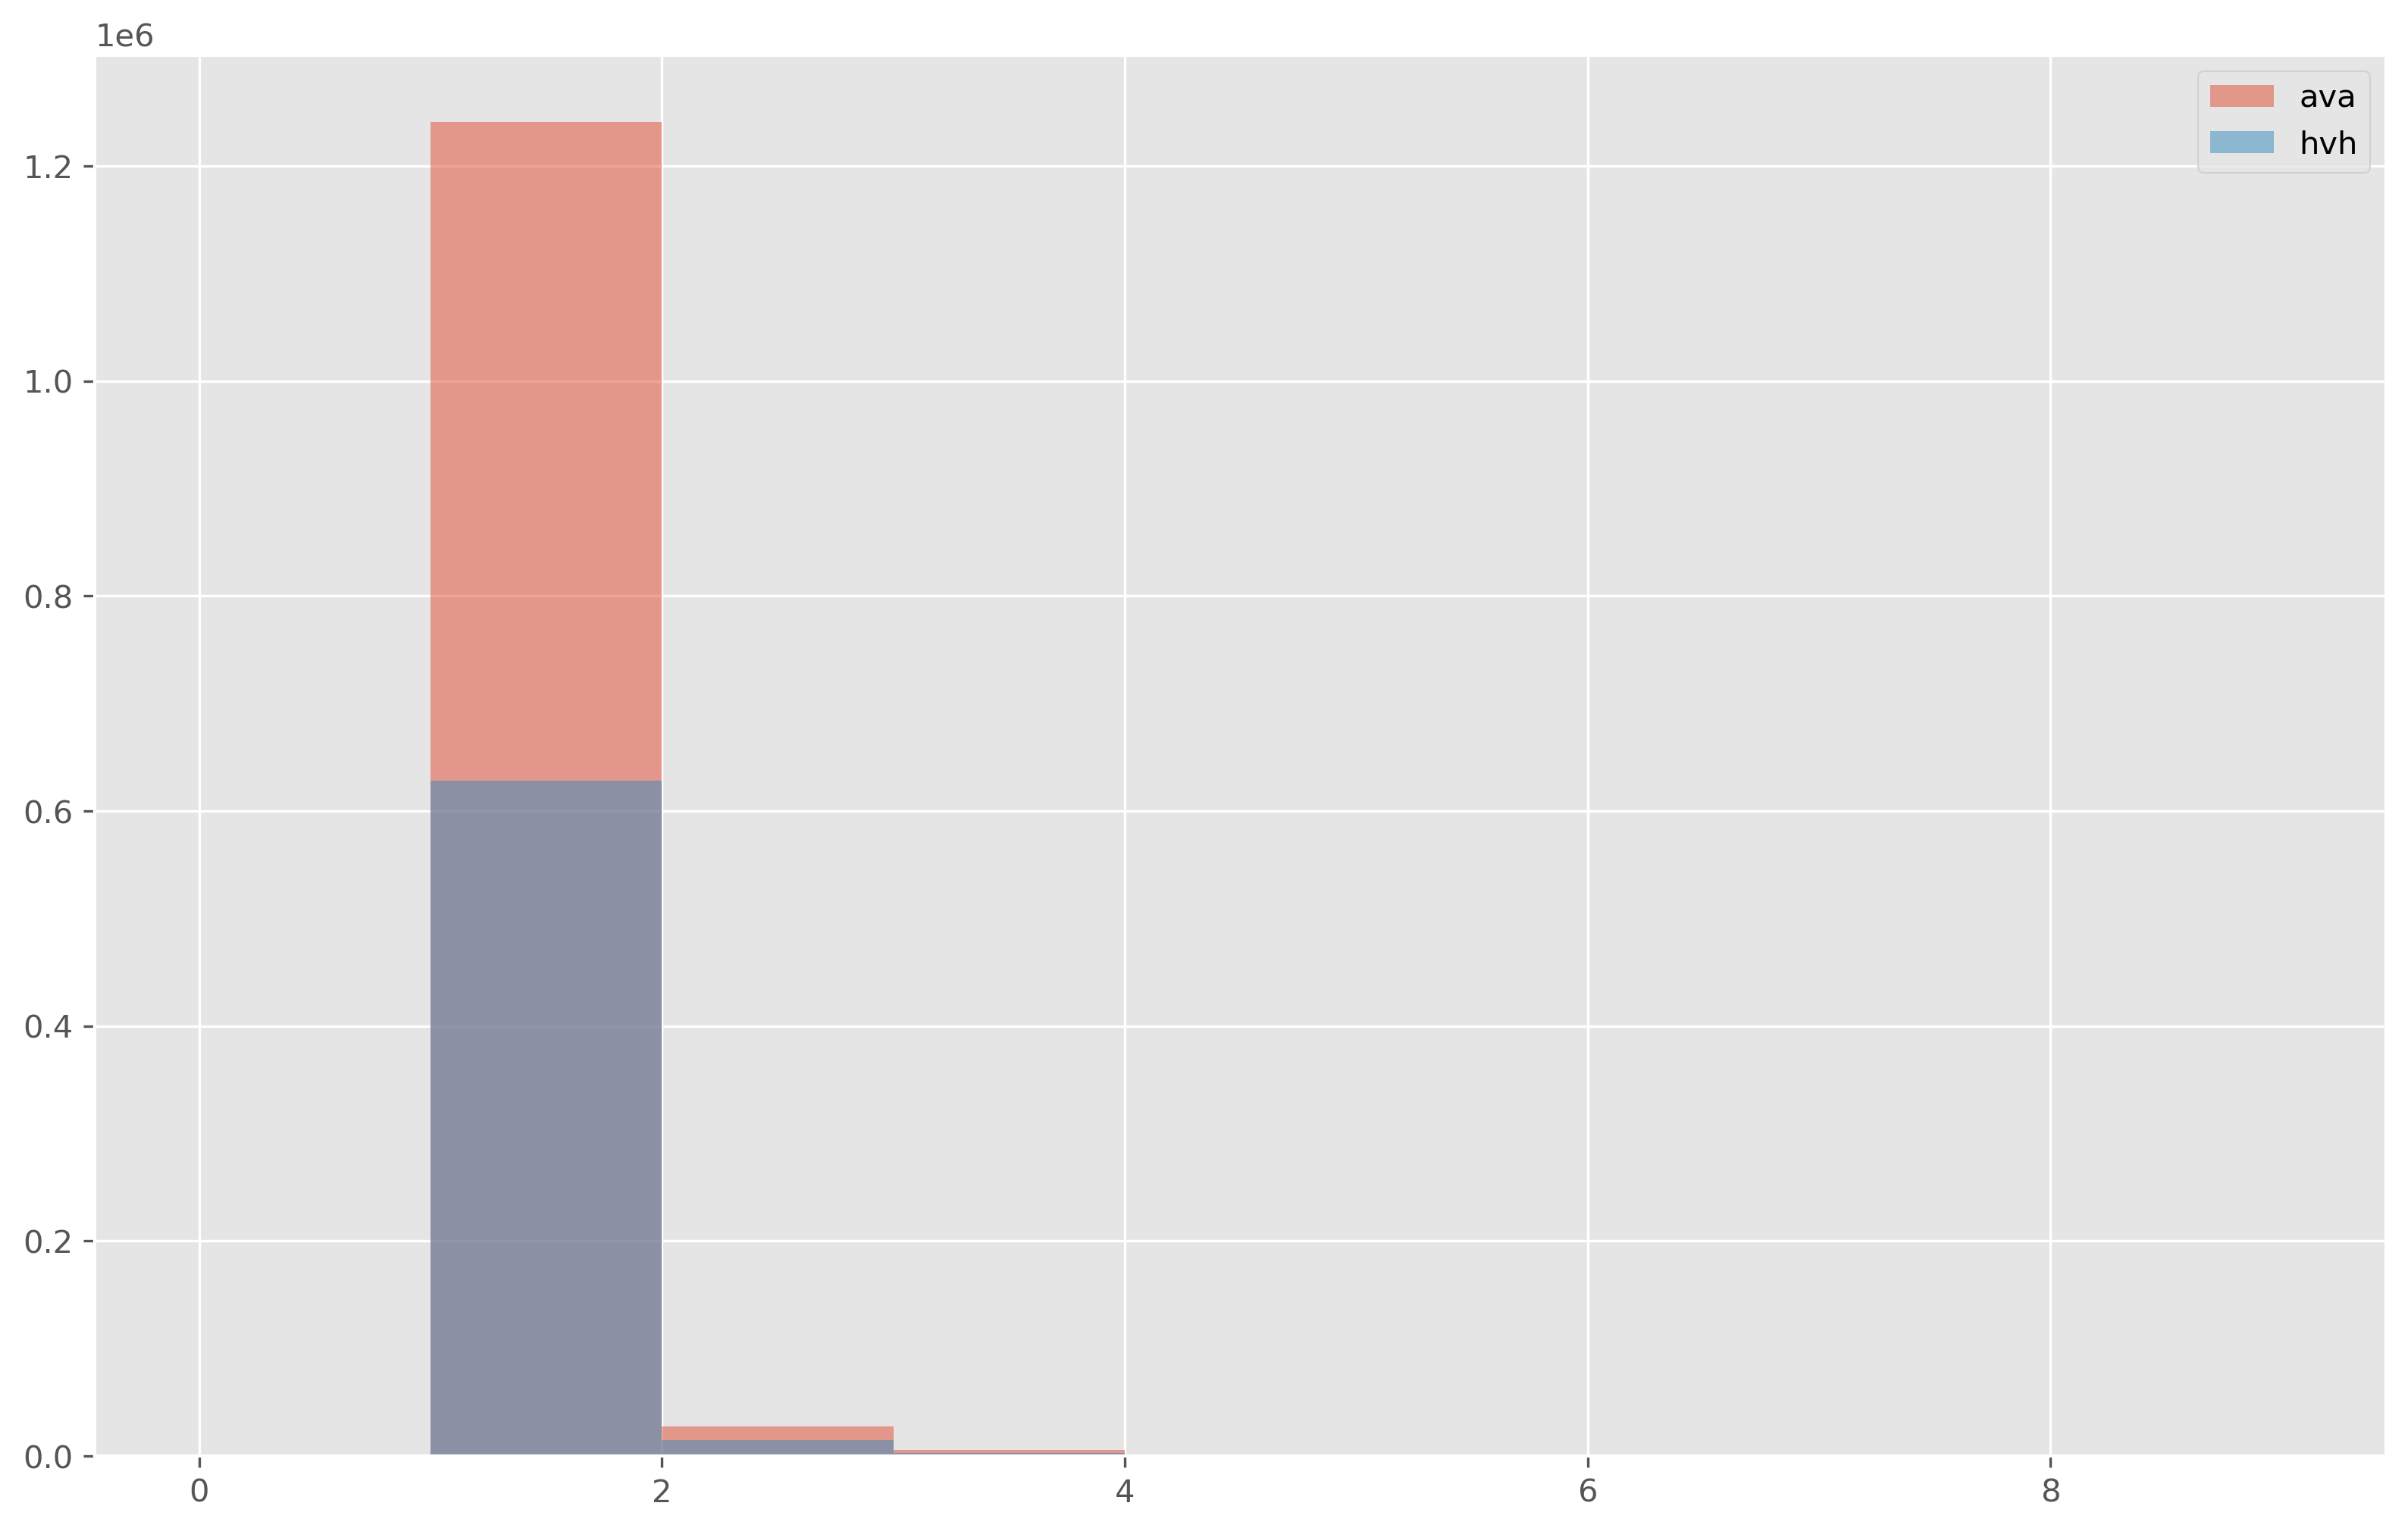

In [8]:
# plot histograms of the number of overlaps per pair for ava and hvh
fig, ax = plt.subplots(dpi=300)
ax.hist(pair_counts["ava"].values(), bins=range(0, 10, 1), alpha=0.5, label="ava")
ax.hist(pair_counts["hvh"].values(), bins=range(0, 10, 1), alpha=0.5, label="hvh")
ax.legend()

In [12]:
# list pairs with different number of overlaps in ava and hvh
num_posible_pairs = len(longest) * len(overlap)
print(f'{num_posible_pairs} possible pairs')
num_hvh_pairs = len(pair_counts["hvh"])
print(f'{num_hvh_pairs} ({num_hvh_pairs/num_posible_pairs:.2%}) pairs in hvh')
num_ava_pairs = len(pair_counts["ava"])
print(f'{num_ava_pairs} ({num_ava_pairs/num_posible_pairs:.2%}) pairs in ava')
num_common_pairs = len(set(pair_counts["hvh"].keys()).intersection(set(pair_counts["ava"].keys())))
num_common_pairs

625000000 possible pairs
647594 (0.10%) pairs in hvh
1276761 (0.20%) pairs in ava


641154